In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "dataset/"

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
vax_symptoms_data = pd.read_csv("VAX_SYMPTOMS_DATA.csv")

In [5]:
vax_vaers_data = pd.read_csv("VAX_VAERS_DATA.csv")

In [6]:
vax_symptoms_data

,Unnamed: 0,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,0,1217550,Body temperature,23.1,Chills,23.1,Dyspnoea,23.1,Headache,23.1,Hyperhidrosis,23.1
1,1,1217550,Pain,23.1,Pyrexia,23.1,Vomiting,23.1,NaN,NaN,NaN,NaN
2,2,1427815,Asthenia,24.0,Fatigue,24.0,Somnolence,24.0,NaN,NaN,NaN,NaN
3,3,2162583,COVID-19,24.1,Vaccine breakthrough infection,24.1,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2189423,Blood test,25.0,Immunisation reaction,25.0,Vasoconstriction,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13487,13487,1622398,Arthralgia,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13488,13488,1168892,Chills,23.1,Dizziness,23.1,Fatigue,23.1,Headache,23.1,Incorrect route of product administration,23.1
13489,13489,1168892,Off label use,23.1,Pain,23.1,Tremor,23.1,NaN,NaN,NaN,NaN
13490,13490,2699484,COVID-19,26.0,Drug ineffective,26.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
vax_vaers_data

,Unnamed: 0,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,0,1217550,04/16/2021,OH,19.00,NaN,NaN,M,NaN,WOKE UP SWEATING; BODY SORENESS; CHILLS; HEADA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,04/10/2021,NaN,Test Date: 20210411; Test Name: Body temperatu...,OTH,NaN,NaN,NaN,Comments: Unknown,NaN,USJNJFOC20210422234,2,04/14/2021,NaN,NaN,NaN,NaN
1,1,1427815,06/25/2021,NY,76.00,76.0,NaN,F,NaN,I started having bad headaches about two weeks...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,02/27/2021,02/28/2021,1.0,None,OTH,NaN,Ezetimibe; pravastatin; amlodipine besylate; l...,A-fib,A-fib,Influenza Shot,vsafe,2,06/25/2021,NaN,Y,NaN,Pradaxa
2,2,2162583,03/07/2022,MN,89.00,89.0,NaN,M,NaN,Fully vaccinated and boosted on 10/15/21. COV...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,10/15/2021,03/04/2022,140.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,2,03/07/2022,NaN,NaN,NaN,NaN
3,3,2189423,02/24/2022,NY,20.00,20.0,NaN,M,NaN,"On December 23, 2021, my son got a blood draw ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,07/29/2021,12/23/2021,147.0,NaN,PHM,NaN,None,None,None,NaN,NaN,2,01/23/2022,NaN,Y,NaN,None
4,4,2422917,08/29/2022,FL,67.00,67.0,NaN,M,NaN,patient hospitalized,NaN,NaN,NaN,NaN,Y,13.0,NaN,NaN,U,09/16/2021,08/16/2022,334.0,NaN,PVT,NaN,NaN,NaN,NaN,NaN,NaN,2,08/29/2022,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9168,9168,2355992,07/03/2022,TX,1.25,NaN,NaN,U,NaN,state registry says 15 month old patient recei...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,06/25/2022,06/25/2022,0.0,NaN,UNK,NaN,NaN,NaN,NaN,NaN,"USMODERNATX, INC.MOD20225",2,06/28/2022,NaN,NaN,NaN,NaN
9169,9169,2356635,07/03/2022,WA,38.00,NaN,NaN,F,NaN,Have not been having regular periods anymore; ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,11/17/2021,NaN,NaN,Test Date: 2021; Test Name: Lab work; Result U...,PUB,NaN,DEPAKOTE; FOLIC ACID; VITAMIN D [COLECALCIFEROL],NaN,Medical History/Concurrent Conditions: Childho...,NaN,USPFIZER INC202200913322,2,07/01/2022,NaN,Y,NaN,NaN
9170,9170,1170968,04/06/2021,IN,37.00,37.0,NaN,F,NaN,Extremely sore arm Chills Slight headache Body...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,04/05/2021,04/06/2021,1.0,None,PVT,NaN,Aleve Venlafaxine Phentermine,None,Hypoglycemia Depression Anxiety,NaN,NaN,2,04/06/2021,NaN,NaN,NaN,None
9171,9171,1622398,08/23/2021,MI,68.00,68.0,NaN,M,NaN,Soreness in my shoulder; This spontaneous case...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,02/06/2021,02/06/2021,0.0,NaN,UNK,NaN,LISINOPRIL; METOPROLOL; ATORVASTATIN; CLOPIDOGREL,Hypercholesterolemia,Medical History/Concurrent Conditions: Stent p...,NaN,"USMODERNATX, INC.MOD20212",2,08/16/2021,NaN,NaN,NaN,NaN


In [8]:
vax_vaers_data["SYMPTOM_TEXT_LENGTH"] = [len(str(i)) for i in vax_vaers_data["SYMPTOM_TEXT"]]

In [9]:
# vax_vaers_data[vax_vaers_data['VAERS_ID']==1217550]['SYMPTOM_TEXT'][0]

In [10]:
# vax_symptoms_data[vax_symptoms_data['VAERS_ID']==1217550]

In [11]:
# sorted(vax_vaers_data['SYMPTOM_TEXT_LENGTH'].unique())

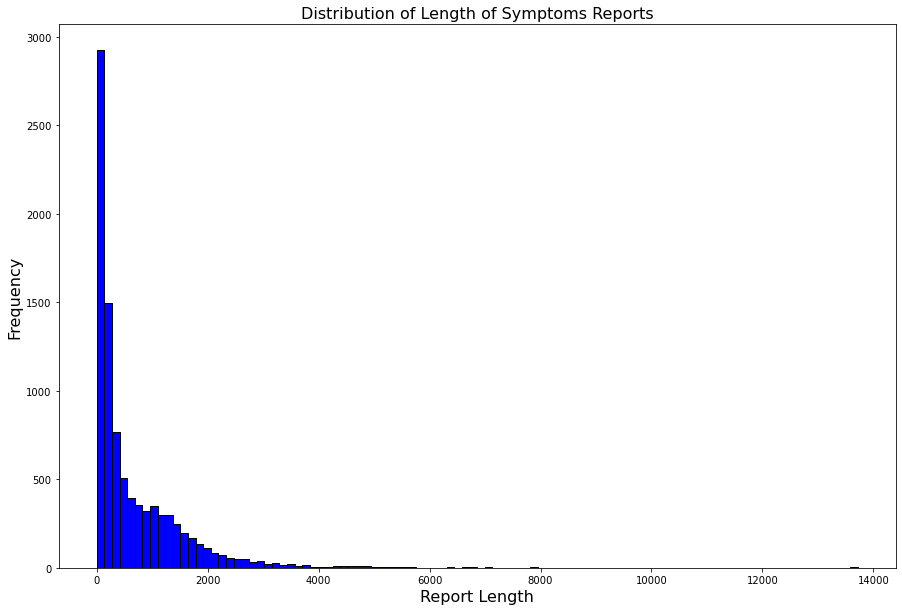

In [12]:
plt.figure(figsize=(15,10))
plt.hist(vax_vaers_data['SYMPTOM_TEXT_LENGTH'], bins=100, color='blue', edgecolor='black')
plt.title("Distribution of Length of Symptoms Reports", fontsize=16)
plt.xlabel("Report Length", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

In [13]:
symptoms_in_reports = []
for i in vax_vaers_data["SYMPTOM_TEXT"].dropna():
    symptoms_in_reports.append(i)

In [14]:
symptoms_in_reports

["WOKE UP SWEATING; BODY SORENESS; CHILLS; HEADACHE; FEVER; THREW UP ABOUT EIGHT TIMES; TROUBLE BREATHING; This spontaneous report received from a parent concerned a 19 year old male. The patient's weight, height, and medical history were not reported. The patient received covid-19 vaccine ad26.cov2.s (suspension for injection, route of admin not reported, batch number: Unknown) dose was not reported, administered on 10-APR-2021 for prophylactic vaccination. The batch number was not reported and it has been requested. No concomitant medications were reported.  On 10-APR-2021, the subject experienced threw up about eight times. On 10-APR-2021, the subject experienced trouble breathing. On 10-APR-2021, the subject experienced body soreness. On 10-APR-2021, the subject experienced chills. On 10-APR-2021, the subject experienced headache. On 10-APR-2021, the subject experienced fever. On 11-APR-2021, the subject experienced woke up sweating.  Laboratory data included: Body temperature (NR:

In [15]:
vax_symptoms_data

,Unnamed: 0,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,0,1217550,Body temperature,23.1,Chills,23.1,Dyspnoea,23.1,Headache,23.1,Hyperhidrosis,23.1
1,1,1217550,Pain,23.1,Pyrexia,23.1,Vomiting,23.1,NaN,NaN,NaN,NaN
2,2,1427815,Asthenia,24.0,Fatigue,24.0,Somnolence,24.0,NaN,NaN,NaN,NaN
3,3,2162583,COVID-19,24.1,Vaccine breakthrough infection,24.1,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2189423,Blood test,25.0,Immunisation reaction,25.0,Vasoconstriction,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13487,13487,1622398,Arthralgia,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13488,13488,1168892,Chills,23.1,Dizziness,23.1,Fatigue,23.1,Headache,23.1,Incorrect route of product administration,23.1
13489,13489,1168892,Off label use,23.1,Pain,23.1,Tremor,23.1,NaN,NaN,NaN,NaN
13490,13490,2699484,COVID-19,26.0,Drug ineffective,26.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
symptoms_list = []
for i in [vax_symptoms_data['SYMPTOM1'], vax_symptoms_data['SYMPTOM2'], vax_symptoms_data['SYMPTOM3'], vax_symptoms_data['SYMPTOM4'], vax_symptoms_data['SYMPTOM5']]:
    for j in i.dropna():
            symptoms_list.append(j)

In [17]:
len(symptoms_list)

42464

In [18]:
unique_list = set(symptoms_list)

In [19]:
len(unique_list)

2813

In [20]:
symptoms_frequency = dict()
for i in unique_list:
    symptoms_frequency[i] = sum(entry.count(i) for entry in symptoms_in_reports)

In [21]:
max(symptoms_frequency.values())

8883

In [22]:
min(symptoms_frequency.values())

0

In [23]:
max_key = max(symptoms_frequency, key=symptoms_frequency.get)

In [24]:
max_key

'COVID-19'

In [25]:
top_100 = dict(sorted(symptoms_frequency.items(), key=lambda x: x[1], reverse=True)[:100])

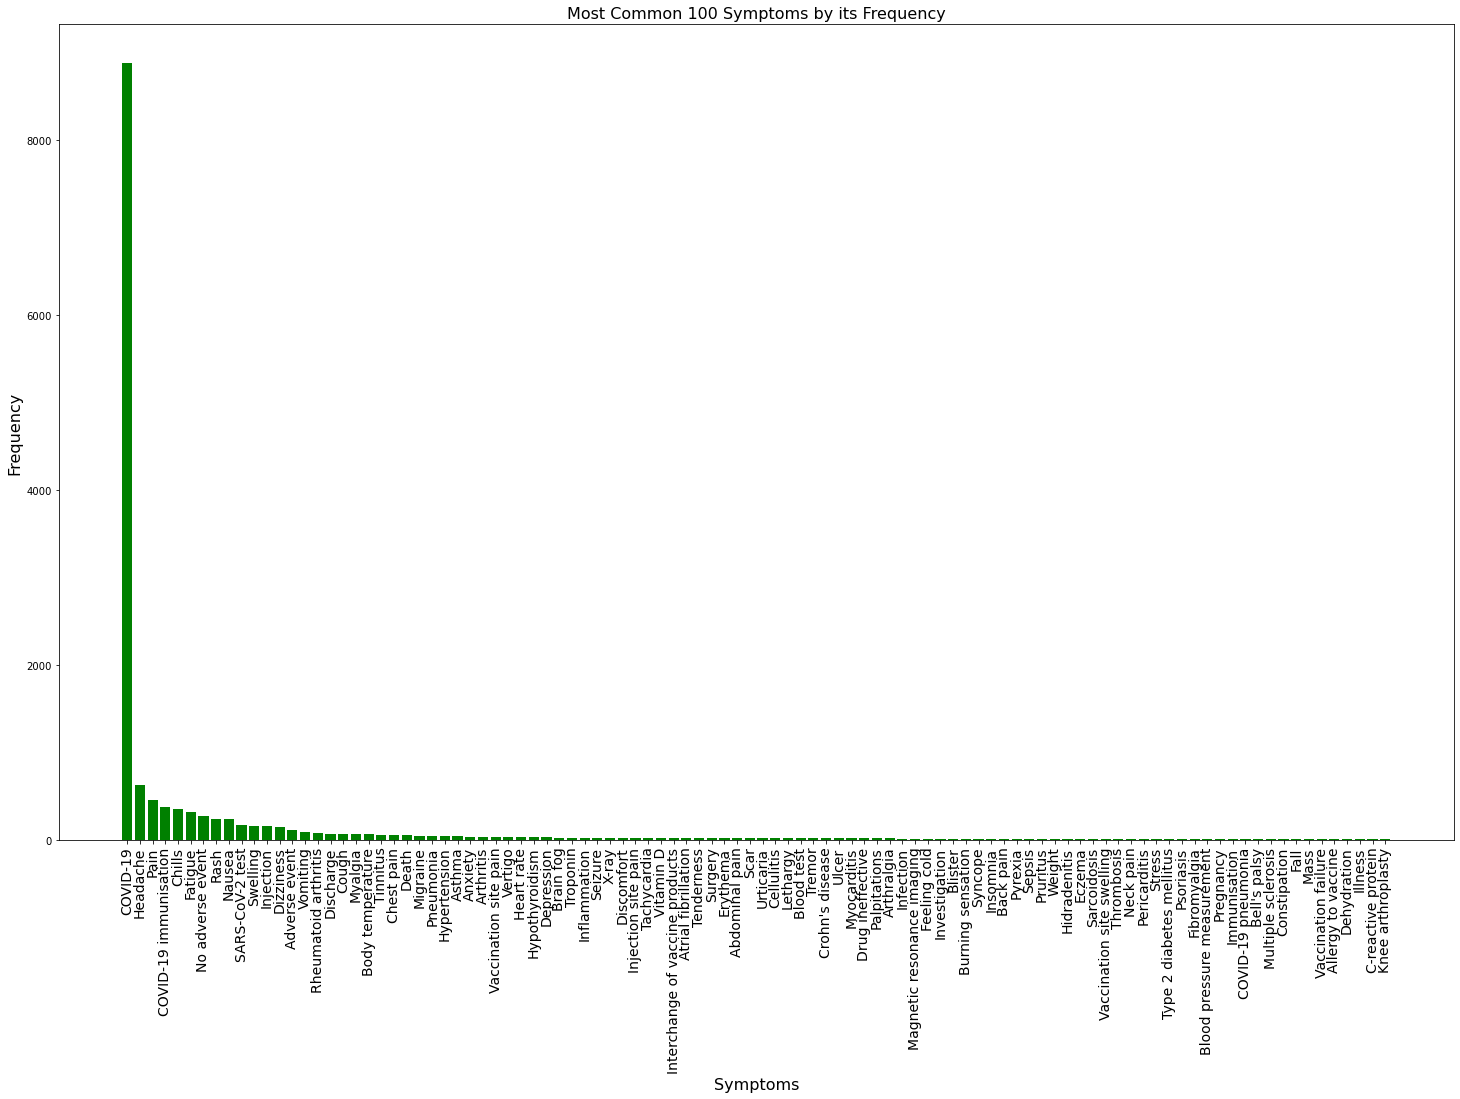

In [26]:
plt.figure(figsize=(25,15))
plt.bar(list(top_100.keys()),list(top_100.values()),color='green')
plt.title("Most Common 100 Symptoms by its Frequency", fontsize=16)
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel("Symptoms", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

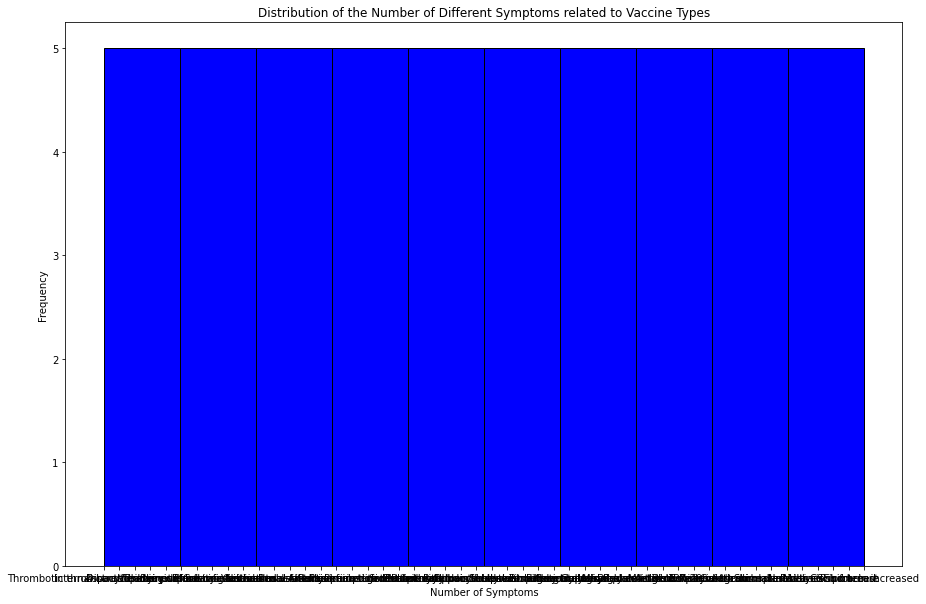

In [82]:
import matplotlib.pyplot as plt

# Assuming symptoms_counts is a list of counts for each vaccine type
plt.figure(figsize=(15, 10))
plt.hist(list(unique_list)[:50], bins=10, color='blue', edgecolor='black')

plt.title("Distribution of the Number of Different Symptoms related to Vaccine Types")
plt.xlabel("Number of Symptoms")
plt.ylabel("Frequency")
plt.show()

In [62]:
# symptoms_list

In [63]:
# unique_list

In [57]:
if unique_list.issubset(symptoms_list):
    print("True")

True


In [69]:
import json
with open("standard_symptoms_list.json",'w') as op_file:
    json.dump(list(unique_list),op_file)

In [28]:
import json
with open("top_100_list.json",'w') as op_file:
    json.dump(list(top_100.keys()),op_file)

In [97]:
pip install wordcloud==1.8.0

     ------------------------------------ 217.1/217.1 kB 944.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [26 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.9\wordcloud
  UPDATING build\lib.win-amd64-3.9\wordcloud/_version.py
  set bu

In [98]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample text data (replace with your own text data)
# unique_list = ['Word', 'clouds', 'fun', 'visualize', 'text', 'data', 'display', 'frequency', 'given']

# Create a WordCloud object with a TrueType font
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(unique_list))

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Turn off axis labels
plt.show()


ValueError: Only supported for TrueType fonts

In [ ]:
# , font_path='C:/Users/aishw/Downloads/AabcedBold.ttf'